In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import scipy.stats as st
from IPython.display import display, Markdown
from functools import reduce
import operator

from common_plotting import read_data, plot, years, months, yearsFmt, add_thp
from common_analysis import analyse_dcv, analyse_dcv_absolute, rel_data_cut_index_last, rel_data_cut_index_first
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10,4)
plt.rc('font', size=14)

In [8]:
thp_data, data = read_data(['ks3458a1-dcv-log.csv', 'ks3458a1-dcv-mv-log.csv', 'k182-dcv-mv-log.csv', 'ks3458a-dcv-log.csv'])
absolute_data_3458a_1 = data['ks3458a1-dcv-log.csv']
absolute_data_3458a_2 = data['ks3458a-dcv-log.csv']
relative_data_3458a = data['ks3458a1-dcv-mv-log.csv']
relative_data_k182 = data['k182-dcv-mv-log.csv']


## 2021-09-10

In [3]:
absolute_data_2021_09_10 = absolute_data_3458a_2[absolute_data_3458a_2.index < pd.Timestamp(2021,9,10,10,10)]
abs_2022_09_10, dcv_results_2022_09_10 = analyse_dcv_absolute(absolute_data_2021_09_10, 'F7001-SMPS-Au799ln', 'ag3458a_2')
display(dcv_results_2022_09_10)
display(abs_2022_09_10)

,temperature_mean,ppm_diff,ppm_sem
D4910avg,32.918002,-6.114349,0.007134
F732a2,33.018164,-20.742024,0.025198
F7001-SMPS-Au799ln,NaN,0.000000,0.000000


,dcv_mean,dcv_sem,temperature_mean
dut,,,
D4910avg,10.000036,4.029058e-08,32.918002
F7001-SMPS-Au799ln,9.999975,5.887748e-08,33.009654
F732a2,10.000182,2.450000e-07,33.018164


## 2021-09-12

In [4]:
absolute_data_2021_09_13 = absolute_data_3458a_2[(absolute_data_3458a_2.index > pd.Timestamp(2021,9,12,22,30)) & (absolute_data_3458a_2.index < pd.Timestamp(2021,9,13,0,0))]
abs_2022_09_13, dcv_results_2022_09_13 = analyse_dcv_absolute(absolute_data_2021_09_13, 'F7001', 'ag3458a_2')
display(dcv_results_2022_09_13)
display(abs_2022_09_13)

,temperature_mean,ppm_diff,ppm_sem
D4910avg,30.118697,-5.845180,0.007267
F7001-SMPS-Au799ln,29.111544,0.051400,0.006657
F732a1,29.281854,-22.973311,0.006303
F732a2,29.336272,-20.722960,0.006808
F732a3,29.250404,15.357066,0.005972
F7001,NaN,0.000000,0.000000


,dcv_mean,dcv_sem,temperature_mean
dut,,,
D4910avg,10.000046,5.573510e-08,30.118697
F7001,9.999986,4.838054e-08,29.571549
F7001-SMPS-Au799ln,9.999982,4.688039e-08,29.111544
F732a1,10.000217,3.686388e-08,29.281854
F732a2,10.000194,4.496416e-08,29.336272
F732a3,9.999834,3.087531e-08,29.250404


## 2022-08-09

In [5]:
absolute_data_2022_08_09 = absolute_data_3458a_1[absolute_data_3458a_1['last_acal_1'] == '2022-08-09T22:42:58.011500']
absolute_data_2022_08_09 = absolute_data_2022_08_09[absolute_data_2022_08_09['dut'] != 'F7001']
dcv_2022_08_09 = analyse_dcv(absolute_data_2022_08_09, relative_data_3458a, 'ag3458a_1', 'ag3458a_1')
display(dcv_2022_08_09)

'Found bad groups:'

,ag3458a_1_dcv,dut
group,,
26,0.000035,D4910-2


,temperature,abs_mean,abs_sem,rel_mean,rel_sem
D4910-1,35.187786,-0.321278,0.009411,-0.290235,0.007593
D4910-2,35.658993,-0.019317,0.009324,-0.097546,0.007923
D4910-3,35.537879,-0.299481,0.014092,-0.468137,0.007399
D4910-4,35.175105,0.349743,0.010765,0.305701,0.007322
F7001bat,35.095278,6.204112,0.008210,6.484320,0.006513
F732a1,34.947451,-17.648101,0.008133,-17.498447,0.006980
F732a2,35.229418,-14.898526,0.012779,-14.788090,0.007220
F732a3,34.957188,23.755563,0.009924,23.861170,0.006794
D4910avg,NaN,0.000000,0.000000,0.000000,0.009211


## 2022-08-25 #1

In [38]:
absolute_data_2022_08_25_1 = absolute_data_3458a_1[absolute_data_3458a_1['last_acal_1'] == '2022-08-25T10:37:27.993489']
relative_data_2022_08_25_1 = relative_data_k182[(relative_data_k182.dut_pos_lead != 'short')]
relative_data_2022_08_25_1 = relative_data_2022_08_25_1[relative_data_2022_08_25_1.index < pd.Timestamp(2022,8,25,16)]
dcv_2022_08_25_1 = analyse_dcv(absolute_data_2022_08_25_1, relative_data_2022_08_25_1, 'ag3458a_1', 'k182')
display(dcv_2022_08_25_1)

'Found bad groups:'

,ag3458a_1_dcv,dut
group,,
23,0.000007,F732a2
31,0.012915,F7001bat
39,0.028177,F7001bat


,temperature,abs_mean,abs_sem,rel_mean,rel_sem
D4910-1,37.726087,-0.281624,0.009442,-0.437808,0.003431
D4910-2,37.556162,-0.030015,0.008038,-0.033919,0.003787
D4910-3,37.427600,-0.420592,0.007651,-0.424565,0.004838
D4910-4,37.209281,0.352034,0.008463,0.212654,0.003569
F7001bat,39.385343,6.424656,0.007820,6.308407,0.001271
F732a1,37.831020,-17.568476,0.008466,-17.518465,0.002749
F732a2,38.092979,-14.870846,0.007340,-14.800509,0.004332
F732a3,38.002569,23.778382,0.007521,23.806758,0.001686
D4910avg,NaN,0.000000,0.000000,0.000000,0.001797


## 2022-08-25 #2

In [6]:
absolute_data_2022_08_25_2 = absolute_data_3458a_1[absolute_data_3458a_1['last_acal_1'] == '2022-08-25T10:37:27.993489']
relative_data_2022_08_25_2 = relative_data_k182[(relative_data_k182.dut_pos_lead != 'short')]
relative_data_2022_08_25_2 = relative_data_2022_08_25_2[(relative_data_2022_08_25_2.index > pd.Timestamp(2022,8,25,16)) & (relative_data_2022_08_25_2.index < pd.Timestamp(2022,8,26,0))]
dcv_2022_08_25_2 = analyse_dcv(absolute_data_2022_08_25_2, relative_data_2022_08_25_2, 'ag3458a_1', 'k182')
display(dcv_2022_08_25_2)

'Found bad groups:'

,ag3458a_1_dcv,dut
group,,
23,0.000007,F732a2
31,0.012915,F7001bat
39,0.028177,F7001bat


,temperature,abs_mean,abs_sem,rel_mean,rel_sem
D4910-1,37.726087,-0.281624,0.009442,NaN,NaN
D4910-2,37.556162,-0.030015,0.008038,NaN,NaN
D4910-3,37.427600,-0.420592,0.007651,NaN,NaN
D4910-4,37.209281,0.352034,0.008463,NaN,NaN
F7001bat,39.385343,6.424656,0.007820,6.543820,0.000792
F732a1,37.831020,-17.568476,0.008466,NaN,NaN
F732a2,38.092979,-14.870846,0.007340,-8.198148,0.000819
F732a3,38.002569,23.778382,0.007521,NaN,NaN
D4910avg,NaN,0.000000,0.000000,0.000000,0.001120


In [9]:
rel_data_copy = relative_data_k182.copy()
rel_data_copy['gap'] = relative_data_k182.index.to_series().diff() > pd.Timedelta('3 hours')
rel_data_copy['group'] = rel_data_copy.gap.cumsum()
cut_1 = rel_data_cut_index_last(rel_data_copy, 1, 'F732a2', 'D4910avg', pd.Timedelta('40 minutes'))
rel_data_cut = rel_data_copy[~cut_1].copy()
rel_data_cut['gap'] = rel_data_cut.index.to_series().diff() > pd.Timedelta('3 hours')
rel_data_cut['group'] = rel_data_cut.gap.cumsum()

In [11]:
voltage_references = ('F732a1', 'F732a2', 'F732a3', 'D4910avg', 'D4910-1', 'D4910-2', 'D4910-3', 'D4910-4')
columns = [(dut, param) for dut in voltage_references for param in ('datetime', 'mean', 'sem', 'temperature', 'pressure', 'humidity')]
results = []
for group in rel_data_cut.group.unique():
    group_samples = rel_data_cut[rel_data_cut.group == group].copy()
    result = analyse_dcv_k182(group_samples)
    flat_result = flatten_relative_dcv_result(result)
    results.append(flat_result)
orig_max_cols = pd.get_option('display.max_columns')
rel_results = pd.DataFrame(results, columns=pd.MultiIndex.from_tuples(columns), index=rel_data_cut.group.unique())
pd.set_option('display.max_columns', None)
display(rel_results)
pd.set_option('display.max_columns', orig_max_cols)

F732a1                                   \
                        datetime       mean       sem temperature   
0  2022-08-25 11:22:17.590431744  23.826725  0.002438   37.619157   
1                            NaT        NaN       NaN         NaN   
2  2022-08-29 14:37:56.017542400  23.974241  0.000651   37.508195   
3  2022-09-21 15:20:56.923994624  24.045509  0.003566   31.926506   
4  2022-12-22 21:38:08.994086400  24.187865  0.003949   27.895061   
5  2023-01-14 18:56:41.392179712  24.475947  0.003604   25.945197   
6  2023-01-22 01:19:35.432957440  24.329748  0.004085   24.418316   
7  2023-01-25 22:41:22.304952832  24.410736  0.004745   25.170996   
8                            NaT        NaN       NaN         NaN   
9  2023-01-27 23:36:17.341893120  24.296323  0.003345   28.350979   
10                           NaT        NaN       NaN         NaN   
11 2023-01-28 15:07:23.155353088  24.389536  0.003931   31.665460   
12 2023-03-02 01:59:41.804903168  24.329724  0.003806   28.327617   
13 2023-06-24 21:42:10.059316224  24.702066  0.003318   32.858124   
14 2023-07-16 20:50:56.948048384  24.812144  0.002518   33.153038   
15 2023-07-22 23:25:36.147859968  24.889152  0.003867   33.479883   

                                                  F732a2                       \
       pressure   humidity                      datetime       mean       sem   
0   1015.337532  28.855276 2022-08-25 11:38:27.978521344  21.109801  0.003885   
1           NaN        NaN                           NaT        NaN       NaN   
2   1022.579408  23.654013 2022-08-29 13:43:49.964445696  21.322970  0.000814   
3   1026.429435  22.709645 2022-09-21 15:28:52.841974784  21.394095  0.003241   
4   1002.113863  33.452271 2022-12-22 21:34:38.862407168  21.430439  0.004298   
5    995.474800  36.025571 2023-01-14 18:53:07.648848896  21.669566  0.004221   
6   1034.795595  27.565945 2023-01-22 01:24:01.665231104  21.589683  0.001685   
7   1025.835012  26.277449 2023-01-26 00:26:54.946850304  21.577355  0.008860   
8           NaN        NaN 2023-01-26 08:23:30.832382208  21.546582  0.007190   
9   1030.047550  27.095842 2023-01-27 23:28:51.173477376  21.578546  0.004598   
10          NaN        NaN 2023-01-28 06:06:57.842015232  21.544061  0.005398   
11  1030.152193  25.268042 2023-01-28 15:03:11.508902912  21.590940  0.005300   
12  1025.493539  22.894800 2023-03-02 01:56:20.820233728  21.535209  0.004686   
13  1021.945571  33.201811 2023-06-24 21:35:13.448096768  21.830229  0.004468   
14  1013.870446  30.129140 2023-07-16 20:44:57.703027456  21.917490  0.002956   
15  1013.415996  29.639502 2023-07-22 23:30:20.788241408  21.912764  0.003170   

                                                              F732a3  \
   temperature     pressure   humidity                      datetime   
0    37.677573  1015.255665  28.696644 2022-08-25 11:44:08.448907520   
1          NaN          NaN        NaN                           NaT   
2    37.120882  1022.884395  23.581948 2022-08-29 11:25:53.247917056   
3    32.455406  1026.352040  21.831325 2022-09-21 15:24:50.224551680   
4    27.719199  1002.049425  33.660435 2022-12-22 21:42:19.887340032   
5    25.936919   995.468495  35.979581 2023-01-14 18:50:16.263861248   
6    24.285600  1034.790586  27.475825 2023-01-22 01:36:55.545875712   
7    24.652354  1025.155756  25.828323 2023-01-26 00:12:51.405470720   
8    26.475819  1025.229465  28.487566 2023-01-26 08:25:27.378796032   
9    28.508733  1030.139306  26.883538 2023-01-27 23:32:20.678178304   
10   28.210090  1030.512973  27.087796 2023-01-28 06:09:22.856514560   
11   31.562729  1030.144740  25.193714 2023-01-28 14:58:13.347951616   
12   28.426128  1025.530239  22.618610 2023-03-02 01:53:24.803950592   
13   32.525971  1021.921053  32.980607 2023-06-24 21:48:59.679369216   
14   33.057914  1013.884212  29.829047 2023-07-16 20:39:41.340619776   
15   33.479883  1013.415996  29.639502 2023-07-22 23:35:00.792702976   

                           

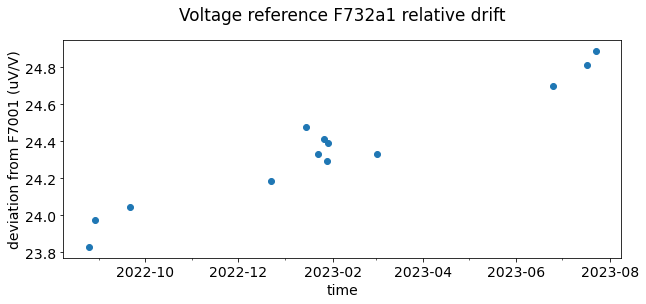

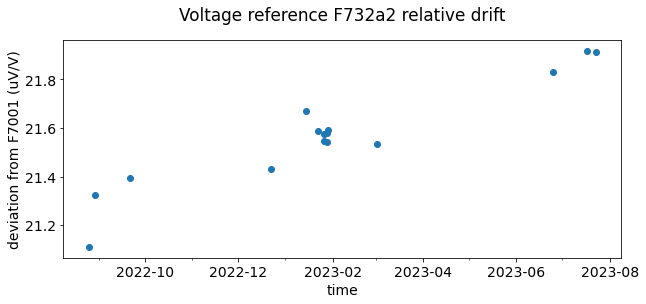

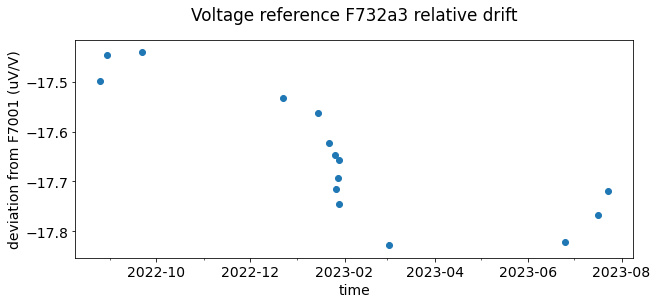

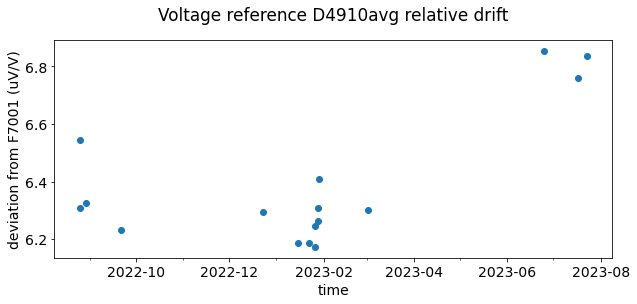

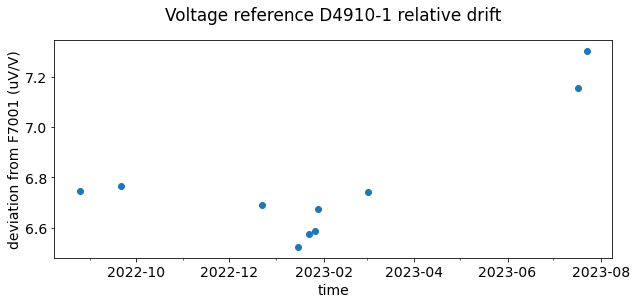

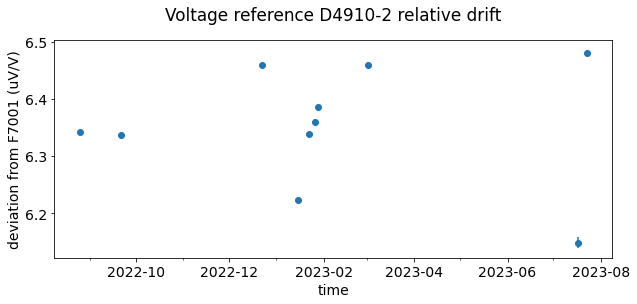

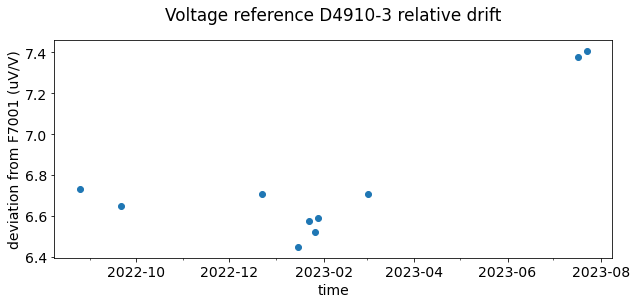

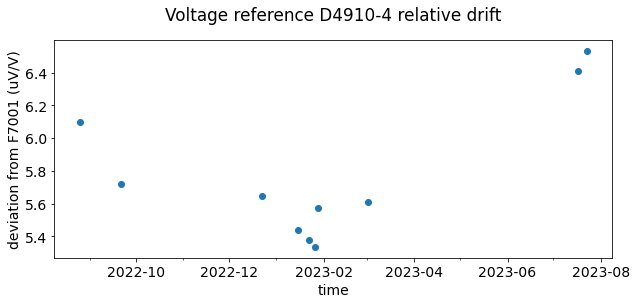

In [12]:
plt.rcParams["figure.figsize"] = (10,4)

rel_results[[(ref, param) for ref in voltage_references for param in ('mean', 'sem', 'datetime')]]
for ref in voltage_references:
    
    plt.errorbar(rel_results[(ref, 'datetime')].dropna(), rel_results[(ref, 'mean')].dropna(), yerr=rel_results[(ref, 'sem')].dropna(), label=ref, fmt='o')
    plt.xlabel('time')
    plt.ylabel('deviation from F7001 (uV/V)')
    plt.title(f'Voltage reference {ref} relative drift', pad=20)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
    plt.show()


## 2022-08-29

In [133]:
analyse_dcv_k182_between_dates(relative_data_k182, pd.Timestamp(2022,8,29,0), pd.Timestamp(2022,8,31,0))

,mean_in_ppm,sem_in_ppm,datetime,temperature,pressure,humidity
dut,,,,,,
D4910avg,6.325167,0.000377,2022-08-29 19:33:12.998833408,37.553076,1021.340352,24.686187
F732a1,23.974241,0.000651,2022-08-29 14:37:56.017542400,37.508195,1022.579408,23.654013
F732a2,21.322970,0.000814,2022-08-29 13:43:49.964445696,37.120882,1022.884395,23.581948
F732a3,-17.445577,0.001121,2022-08-29 11:25:53.247917056,36.152441,1023.289524,24.938915


## 2022-09-21

In [64]:
analyse_dcv_k182_between_dates(relative_data_k182, pd.Timestamp(2022,9,21,0), pd.Timestamp(2022,9,22,0))

,mean_in_ppm,sem_in_ppm
dut,,
D4910-1,6.763187,0.004560
D4910-2,6.336515,0.002674
D4910-3,6.646912,0.003172
D4910-4,5.719434,0.003684
D4910avg,6.232962,0.001539
D4910avg-bat,6.240694,0.002025
F732a1,24.045509,0.003566
F732a2,21.394095,0.003241
F732a3,-17.439186,0.002592


## 2022-12-22

In [65]:
analyse_dcv_k182_between_dates(relative_data_k182, pd.Timestamp(2022,12,22,0), pd.Timestamp(2022,12,24,0))

,mean_in_ppm,sem_in_ppm
dut,,
D4910-1,6.688159,0.003541
D4910-2,6.460146,0.003496
D4910-3,6.709578,0.004723
D4910-4,5.647943,0.003804
D4910avg,6.293985,0.000573
F732a1,24.187865,0.003949
F732a2,21.430439,0.004298
F732a3,-17.532750,0.002963


## 2023-01-14

In [66]:
analyse_dcv_k182_between_dates(relative_data_k182, pd.Timestamp(2023,1,14,0), pd.Timestamp(2023,1,15,0))

,mean_in_ppm,sem_in_ppm
dut,,
D4910-1,6.522008,0.003034
D4910-2,6.223326,0.003172
D4910-3,6.447954,0.003997
D4910-4,5.438480,0.002397
D4910avg,6.187202,0.001649
F732a1,24.475947,0.003604
F732a2,21.669566,0.004221
F732a3,-17.562918,0.002848


## 2023-01-21

In [67]:
analyse_dcv_k182_between_dates(relative_data_k182, pd.Timestamp(2023,1,21,0), pd.Timestamp(2023,1,23,0))

,mean_in_ppm,sem_in_ppm
dut,,
D4910-1,6.572747,0.004437
D4910-2,6.339448,0.003044
D4910-3,6.576290,0.003192
D4910-4,5.377199,0.003357
D4910avg,6.186684,0.001585
F732a1,24.329748,0.004085
F732a2,21.589683,0.001685
F732a3,-17.623623,0.003280


## 2023-01-25

In [68]:
analyse_dcv_k182_between_dates(relative_data_k182, pd.Timestamp(2023,1,25,0), pd.Timestamp(2023,1,26,4))

,mean_in_ppm,sem_in_ppm
dut,,
D4700+10V,0.906193,0.006293
D4700-10V,-1.384209,0.007512
D4910-1,6.586035,0.005714
D4910-2,6.359449,0.005200
D4910-3,6.520924,0.006778
D4910-4,5.335311,0.006787
D4910avg,6.172606,0.003190
F732a1,24.410736,0.004745
F732a2,21.577355,0.008860


## 2023-01-26

In [131]:
analyse_dcv_k182_between_dates(relative_data_k182, pd.Timestamp(2023,1,26,5), pd.Timestamp(2023,1,27,0))

,mean_in_ppm,sem_in_ppm,datetime,temperature,pressure,humidity
dut,,,,,,
D4910avg,6.243979,0.002652,2023-01-26 08:21:15.773647360,26.494485,1025.235963,28.525199
F732a2,21.546582,0.007190,2023-01-26 08:23:30.832382208,26.475819,1025.229465,28.487566
F732a3,-17.714315,0.004312,2023-01-26 08:25:27.378796032,26.476574,1025.254792,28.551561


## 2023-01-27

In [82]:
analyse_dcv_k182_between_dates(relative_data_k182, pd.Timestamp(2023,1,27,0), pd.Timestamp(2023,1,28,3))

,mean_in_ppm,sem_in_ppm
dut,,
D4910-1,6.675079,0.001315
D4910-2,6.386271,0.003850
D4910-3,6.588272,0.003336
D4910-4,-5.574115,0.002477
D4910avg,1.574288,0.269541
F732a1,24.296323,0.003345
F732a2,21.578546,0.004598
F732a3,-17.692662,0.003245


## 2023-01-28  #1

In [71]:
analyse_dcv_k182_between_dates(relative_data_k182, pd.Timestamp(2023,1,28,3), pd.Timestamp(2023,1,28,10))

,mean_in_ppm,sem_in_ppm
dut,,
D4910avg,6.306685,0.003104
F732a2,21.544061,0.005398
F732a3,-17.745087,0.003424


## 2023-01-28 #2

In [78]:
analyse_dcv_k182_between_dates(relative_data_k182, pd.Timestamp(2023,1,28,10), pd.Timestamp(2023,1,29,0))

,mean_in_ppm,sem_in_ppm
dut,,
D4910avg,6.410378,0.003127
F732a1,24.389536,0.003931
F732a2,21.590940,0.005300
F732a3,-17.656766,0.003660


## 2023-03-02

In [132]:
analyse_dcv_k182_between_dates(relative_data_k182, pd.Timestamp(2023,3,2,0), pd.Timestamp(2023,3,3,0))

,mean_in_ppm,sem_in_ppm,datetime,temperature,pressure,humidity
dut,,,,,,
D4700+10V,2.492350,0.005334,2023-03-02 02:12:43.248056064,28.226776,1025.474411,23.450122
D4700-10V,-2.779203,0.004971,2023-03-02 02:18:22.361328896,29.136018,1025.485922,23.299793
D4910-1,6.742511,0.002584,2023-03-02 01:25:07.547614208,29.707735,1025.666974,21.416067
D4910-2,6.459280,0.004428,2023-03-02 01:27:50.403830784,29.515921,1025.645896,21.373992
D4910-3,6.705433,0.004884,2023-03-02 01:30:34.301570560,29.371260,1025.612942,21.387578
D4910-4,5.612283,0.003459,2023-03-02 01:33:54.031121920,29.142253,1025.586240,21.564118
D4910avg,5.070917,0.128787,2023-03-02 01:46:44.886707456,29.260294,1025.570536,22.208220
F732a2,21.535209,0.004686,2023-03-02 01:56:20.820233728,28.426128,1025.530239,22.618610
F732a3,4.932923,1.305990,2023-03-02 01:56:48.413458432,28.419873,1025.495854,22.724599


## 2023-06-24

In [80]:
analyse_dcv_k182_between_dates(relative_data_k182, pd.Timestamp(2023,6,24,0), pd.Timestamp(2023,6,25,0))


,dut,polarity,mean,std,sem,count,datetime,temperature,pressure,humidity
0,D4910avg,negative,0.000068,5.091221e-07,1.826465e-08,777,2023-06-24 21:53:23.996986624,33.439963,1021.946255,33.097191
1,D4910avg,positive,0.000069,4.149591e-07,1.291711e-08,1032,2023-06-24 21:51:06.337844992,33.426223,1021.933355,33.125428
2,F732a1,negative,0.000247,3.968562e-07,3.330343e-08,142,2023-06-24 21:41:24.569703424,32.768313,1021.939307,33.178102
3,F732a1,positive,0.000247,3.667087e-07,3.306501e-08,123,2023-06-24 21:42:55.548929280,32.947936,1021.951835,33.225520
4,F732a2,negative,0.000218,5.137721e-07,4.523511e-08,129,2023-06-24 21:34:34.872272384,32.535483,1021.918886,32.928237
5,F732a2,positive,0.000219,4.951765e-07,4.411383e-08,126,2023-06-24 21:35:52.023920896,32.516459,1021.923220,33.032976
6,F732a3,negative,-0.000179,5.568077e-07,5.000281e-08,124,2023-06-24 21:48:22.449885440,33.450411,1021.890405,32.827177
7,F732a3,positive,-0.000178,4.440571e-07,4.087877e-08,118,2023-06-24 21:49:36.908852736,33.542618,1021.873324,32.839835


,mean_in_ppm,sem_in_ppm,datetime,temperature,pressure,humidity
dut,,,,,,
D4910avg,6.854409,0.001582,2023-06-24 21:52:15.167415808,33.433093,1021.939805,33.111310
F732a1,24.702066,0.003318,2023-06-24 21:42:10.059316224,32.858124,1021.945571,33.201811
F732a2,21.830229,0.004468,2023-06-24 21:35:13.448096768,32.525971,1021.921053,32.980607
F732a3,-17.821683,0.004567,2023-06-24 21:48:59.679369216,33.496514,1021.881865,32.833506


## 2023-07-16

In [80]:
analyse_dcv_k182_between_dates(relative_data_k182, pd.Timestamp(2023,7,16,0), pd.Timestamp(2023,7,17,0))

,mean_in_ppm,sem_in_ppm
dut,,
D4910-1,7.155740,0.002661
D4910-2,6.148548,0.009260
D4910-3,7.377472,0.004110
D4910-4,6.410337,0.002794
D4910avg,6.758974,0.001877
F732a1,24.812144,0.002518
F732a2,21.917490,0.002956
F732a3,-17.766707,0.002642


# Shared functions

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st

from common_plotting import read_data, plot, years, months, yearsFmt, add_thp

def analyse_dcv(absolute_data, relative_data, meter_absolute, meter_relative):
    absolute_results, absolute_ratios_in_ppm = analyse_dcv_absolute(absolute_data, 'D4910avg', meter_absolute)
    f7001_value = absolute_results[absolute_results.index == 'F7001bat'][['dcv_mean']].iloc[0,0]
    relative_results_in_ppm = analyse_dcv_relative(relative_data, 'F7001bat', f7001_value, 'D4910avg', meter_relative)
    return dcv_combine_absolute_and_relative(absolute_ratios_in_ppm, relative_results_in_ppm)

def analyse_dcv_k182(relative_data_k182):
    short_voltage = relative_data_k182[relative_data_k182.dut_pos_lead != 'short']['k182_dcv'].mean()
    relative_data = relative_data_k182[(relative_data_k182.dut_pos_lead != 'short')]
    results = analyse_dcv_relative(relative_data, 'F7001bat', 10, 'F7001bat', 'k182', short_voltage)
    return results


def analyse_dcv_k182_between_dates(relative_data_k182, start_timestamp, end_timestamp):
    relative_data = relative_data_k182[(relative_data_k182.dut_pos_lead != 'short')]
    relative_data = relative_data[(relative_data.index >= start_timestamp) & (relative_data.index <= end_timestamp)].copy()
    results = analyse_dcv_relative(relative_data, 'F7001bat', 10, 'F7001bat', 'k182')
    return results

def dcv_combine_absolute_and_relative(ratios_ppm, relative_results_in_ppm):
    combined = ratios_ppm.join(relative_results_in_ppm)
    combined.columns = ['temperature', 'abs_mean', 'abs_sem', 'rel_mean', 'rel_sem']
    return combined

def analyse_dcv_relative(relative_data, reference_name, reference_value, new_reference_name, meter, short_offset=0):
    filtered_data = relative_data[(relative_data.dut_neg_lead == reference_name) | (relative_data.dut_pos_lead == reference_name)].copy()
#     filtered_data = relative_dcv_substract_offset(filtered_data, meter, short_offset)
    relative_dcv_add_polarity(filtered_data, reference_name, meter)
    relative_results_in_ppm = relative_results_to_ppm(filtered_data, reference_name, reference_value, new_reference_name)
    
    if reference_name != new_reference_name:
        relative_results_in_ppm = retarget_reference(relative_results_in_ppm, reference_name, reference_value, new_reference_name)
    
    return relative_results_in_ppm


def analyse_dcv_absolute(absolute_data, reference_name, meter):
    absolute_data_with_groups = add_dut_and_setting_group(absolute_data)
    absolute_data = analyse_group_quality(absolute_data_with_groups, meter)
    absolute_data_first_and_last_in_group_removed = clean_groups(absolute_data_with_groups, meter)
    cleaned_absolute_data = aggregate_absolute_data_by_group(absolute_data_first_and_last_in_group_removed, meter)
    #display(cleaned_absolute_data)
    absolute_grouped_by_dut_group = aggregate_absolute_data_by_dut_group(cleaned_absolute_data, meter)
    absolute_results = absolute_grouped_by_dut_group.groupby('dut').agg({'dcv_mean': 'mean', 'dcv_sem': combine_stds_sum, 'temperature_mean': 'mean', 'datetime': 'mean'})
    ratios_from_absolute = dcv_calculate_ratios(absolute_grouped_by_dut_group, reference_name)
    ratios_in_ppm = absolute_results_to_ppm(ratios_from_absolute)
    return absolute_results, ratios_in_ppm

def combine_stds_sum(stds):
    return np.sqrt(np.sum(stds**2) / np.size(stds))

def combine_stds_ratio_product(product_or_ration_value, mean1, sem1, mean2, sem2):
    return np.abs(product_or_ration_value) * np.sqrt((sem1 / mean1)**2 + (sem2 / mean2)**2)

def add_dut_and_setting_group(data):
    data_groups = (data[['dut', 'dut_setting']].apply(tuple, axis=1) != data[['dut', 'dut_setting']].shift().apply(tuple, axis=1)).cumsum().rename('group')
    return data.join(data_groups)

def add_dut_neg_and_pos_group(data):
    data_groups = (data[['dut_neg_lead', 'dut_pos_lead']].apply(tuple, axis=1) != data[['dut_neg_lead', 'dut_pos_lead']].shift().apply(tuple, axis=1)).cumsum().rename('group')
    return data.join(data_groups)

def std_minus_first(series):
    return np.std(series.iloc[:-1])

def std_minus_last(series):
    return np.std(series.iloc[1:])

def analyse_group_quality(data, meter):
    groups = data.groupby('group').agg({f'{meter}_dcv': ['std', std_minus_first, std_minus_last]})
    return data
    

def clean_groups(data, meter):
    groups = data.groupby('group').apply(lambda x: x.iloc[1:-1]).droplevel(0)
    quality = groups.groupby('group').agg({f'{meter}_dcv': 'std', 'dut': 'last'})
    bad_group_index = quality[f'{meter}_dcv'] >= 1e-6
    if bad_group_index.any():
        bad_groups = quality[bad_group_index]
        display("Found bad groups:")
        display(bad_groups)
        return groups[~groups.group.isin(bad_groups.index)]
    return groups

def aggregate_absolute_data_by_group(data, meter):
    return data.reset_index().groupby('group').agg({f'{meter}_dcv': ['mean', 'std', 'sem', 'count'], 'temperature': ['mean', 'std', 'sem', 'count'], 'dut': 'last', 'dut_setting': 'last', 'datetime': 'mean'})

def aggregate_absolute_data_by_dut_group(absolute_dcv_data, meter):
    data_with_dut_group = absolute_dcv_data.copy()
    # display(absolute_dcv_data)
    data_with_dut_group['dut_group'] = (data_with_dut_group['dut']['last'] != data_with_dut_group['dut']['last'].shift(1)).cumsum()
    # display(    data_with_dut_group)
    # display((data_with_dut_group['dut']['last'] != data_with_dut_group['dut']['last'].shift(-1)))
    data_with_dut_group.columns = ['_'.join(col) for col in data_with_dut_group.columns.values]
    data_grouped_by_dut = data_with_dut_group.groupby('dut_group_').agg(
        {'dut_last': 'last', f'{meter}_dcv_mean': lambda v: np.mean(np.abs(v)), (f'{meter}_dcv_sem'): combine_stds_sum, 'temperature_mean': 'mean', 'datetime_mean': 'mean'})
    data_grouped_by_dut.columns = ['dut', 'dcv_mean', 'dcv_sem', 'temperature_mean', 'datetime']
    # display(data_grouped_by_dut)
    # display(    data_with_dut_group)
    return data_grouped_by_dut


def dcv_calculate_ratios(grouped_by_dut, reference):
    refs = grouped_by_dut[grouped_by_dut.dut == reference]
    duts = grouped_by_dut[grouped_by_dut.dut != reference]
    ratio_input = duts.apply(lambda x: dcv_add_prev_and_next_refs(refs, grouped_by_dut, x.name), axis=1)

    ratios_before_input = ratio_input[~ratio_input.dut_before.isna()].copy()
    ratios_before_input['ratio'] = ratios_before_input.dcv_mean / ratios_before_input.dcv_mean_before
    ratios_before_input['ratio_sem'] = combine_stds_ratio_product(ratios_before_input.ratio, ratios_before_input.dcv_mean, ratios_before_input.dcv_sem,
                                                                  ratios_before_input.dcv_mean_before, ratios_before_input.dcv_sem_before)

    ratios_after_input = ratio_input[~ratio_input.dut_after.isna()].copy()
    ratios_after_input['ratio'] = ratios_after_input.dcv_mean / ratios_after_input.dcv_mean_after
    ratios_after_input['ratio_sem'] = combine_stds_ratio_product(ratios_after_input.ratio, ratios_after_input.dcv_mean, ratios_after_input.dcv_sem,
                                                                 ratios_after_input.dcv_mean_after, ratios_after_input.dcv_sem_after)

    ratios_before_and_after = pd.concat(
        [ratios_before_input[['dut', 'ratio', 'ratio_sem', 'temperature_mean']], ratios_after_input[['dut', 'ratio', 'ratio_sem', 'temperature_mean']]])
    ratios_from_absolute = ratios_before_and_after.groupby('dut').agg({'ratio': 'mean', 'ratio_sem': combine_stds_sum, 'temperature_mean': 'mean'})
    ratios_from_absolute = pd.concat([ratios_from_absolute, pd.DataFrame({'ratio': 1, 'ratio_sem': 0, 'temperature_mean': np.nan}, index=(reference,))])
    return ratios_from_absolute


def dcv_add_prev_and_next_refs(refs, duts, dut_index):
    refs_with_dut = refs.copy()
    refs_with_dut.loc[dut_index] = duts.loc[dut_index]
    refs_with_dut.sort_index(inplace=True)
    return pd.concat([refs_with_dut, refs_with_dut.shift(1).add_suffix('_before'), refs_with_dut.shift(-1).add_suffix('_after')], axis=1).loc[dut_index]



def relative_dcv_add_polarity(data, reference_name, meter):
    data['polarity'] = data.dut_neg_lead.apply(lambda dut: 'positive' if dut == reference_name else 'negative')
    data['dut'] = data.apply(lambda row: row.dut_neg_lead if row.polarity == 'negative' else row.dut_pos_lead, axis=1)
    data.loc[data['polarity'] == 'positive','corrected_value'] = data[f'{meter}_dcv']
    data.loc[data['polarity'] == 'negative','corrected_value'] = -data[f'{meter}_dcv']
    check_sign(data, meter)


def check_sign(data, meter):
    data['sign'] = (data[f'{meter}_dcv'] / data[f'{meter}_dcv'].abs())
    check_sign_data = data.reset_index().groupby(['dut', 'polarity']).agg({'sign': 'unique', 'datetime': 'first'})
    check_sign_data['sign_length'] = check_sign_data['sign'].apply(lambda r: len(r))
    sign_failures = check_sign_data[check_sign_data.sign_length > 1]
    if not sign_failures.empty:
        display("Sign flip in measurement with same reported polarity and dut")
        display(sign_failures)
        for dut in sign_failures.reset_index().dut.unique():
            display(data[data.dut == dut])


def relative_dcv_substract_offset(relative_data, meter, short_offset):
    relative_data[f'{meter}_dcv'] -= short_offset
    return relative_data


def relative_results_to_ppm(relative_data, reference_name, reference_value, new_reference_name):
    grouped_by_dut_polarity = relative_data.reset_index().groupby(['dut', 'polarity']) \
        .agg({'corrected_value': ['mean', 'std', 'sem', 'count'], 'datetime': 'mean', 'temperature': 'mean', 'pressure': 'mean', 'humidity': 'mean'}).reset_index()
    grouped_by_dut_polarity.columns = ('dut', 'polarity', 'mean', 'std', 'sem', 'count', 'datetime', 'temperature', 'pressure', 'humidity')
    relative_results = grouped_by_dut_polarity.groupby('dut').agg({'mean': 'mean', 'sem': combine_stds_sum, 'datetime': 'mean', 'temperature': 'mean', 'pressure': 'mean', 'humidity': 'mean'})
    relative_results_in_ppm = pd.DataFrame()
    relative_results_in_ppm.index = relative_results.index
    relative_results_in_ppm['mean_in_ppm'] = (relative_results['mean'] / reference_value) * 1e6
    relative_results_in_ppm['sem_in_ppm'] = (relative_results['sem'] / reference_value) * 1e6
    relative_results_in_ppm['datetime'] = relative_results['datetime']
    relative_results_in_ppm['temperature'] = relative_results.temperature
    relative_results_in_ppm['pressure'] = relative_results.pressure
    relative_results_in_ppm['humidity'] = relative_results.humidity
    return relative_results_in_ppm


def retarget_reference(relative_results_in_ppm, reference_name, new_reference_name):
    relative_results_in_ppm = pd.concat([relative_results_in_ppm, pd.DataFrame({'mean_in_ppm': 0, 'sem_in_ppm': 0}, index=(reference_name,))])
    relative_results_in_ppm['mean_in_ppm'] = relative_results_in_ppm[relative_results_in_ppm.index == new_reference_name].mean_in_ppm.iloc[0]-relative_results_in_ppm.mean_in_ppm
    relative_results_in_ppm['sem_in_ppm'] = np.sqrt(relative_results_in_ppm[relative_results_in_ppm.index == new_reference_name].sem_in_ppm.iloc[0]**2+relative_results_in_ppm.sem_in_ppm**2)
    return relative_results_in_ppm


def absolute_results_to_ppm(ratios):
    ratios_ppm = ratios.copy().drop(['ratio', 'ratio_sem'], axis=1)
    ratios_ppm['ppm_diff'] = (1-ratios.ratio) * 1e6
    ratios_ppm['ppm_sem'] = ratios.ratio_sem * 1e6
    return ratios_ppm


def flatten_relative_dcv_result(rel_results):
    rows = rel_results.apply(lambda row: {(row.name, 'datetime'): row.datetime, (row.name, 'mean'): row.mean_in_ppm, (row.name, 'sem'): row.sem_in_ppm, (row.name, 'temperature'): row.temperature, (row.name, 'pressure'): row.pressure, (row.name, 'humidity'): row.humidity}, axis=1)
    return reduce(operator.ior, rows, {})

In [5]:
# Misc analyses

## Check groupings

In [6]:
orig_max_rows = pd.get_option('display.max_rows')
pd.set_option('display.max_rows', None)
duration_data = rel_data_cut.reset_index().groupby(['group', 'dut_neg_lead', 'dut_pos_lead']).agg({'datetime': ['min', 'max']})
duration_data['duration'] = duration_data['datetime']['max'] - duration_data['datetime']['min']
display(duration_data.sort_values(('datetime', 'min')))
pd.set_option('display.max_rows', orig_max_rows)

datetime  \
                                                       min   
group dut_neg_lead dut_pos_lead                              
0     F732a3       short        2022-08-25 10:54:36.345585   
      F7001bat     F732a3       2022-08-25 11:10:49.192938   
      F732a3       F7001bat     2022-08-25 11:11:47.817884   
      F7001bat     F732a2       2022-08-25 11:15:00.538933   
      F732a2       F7001bat     2022-08-25 11:16:11.098328   
      F7001bat     F732a1       2022-08-25 11:19:30.916404   
      F732a1       F7001bat     2022-08-25 11:21:42.822080   
      D4910avg     F7001bat     2022-08-25 12:17:05.303089   
      F7001bat     D4910avg     2022-08-25 12:19:05.447746   
                   D4910-1      2022-08-25 12:20:48.426500   
      D4910-1      F7001bat     2022-08-25 12:26:34.963214   
      D4910-2      F7001bat     2022-08-25 12:27:26.435180   
      F7001bat     D4910-2      2022-08-25 12:29:13.876519   
                   D4910-3      2022-08-25 12:30:06.651368   
      D4910-3      F7001bat     2022-08-25 12:31:39.562114   
      D4910-4      F7001bat     2022-08-25 12:33:50.013982   
      F7001bat     D4910-4      2022-08-25 12:36:06.086554   
1     F7001bat     D4910avg     2022-08-25 18:20:26.367591   
      D4910avg     F7001bat     2022-08-25 18:28:26.620399   
2     F732a2       D4910avg     2022-08-29 08:24:27.698550   
      D4910avg     F732a2       2022-08-29 09:05:19.275537   
                   F732a1       2022-08-29 09:46:38.423818   
      F732a1       D4910avg     2022-08-29 10:23:36.217180   
      F732a3       F7001bat     2022-08-29 11:19:20.572905   
      F7001bat     F732a3       2022-08-29 11:24:27.275045   
                   F732a2       2022-08-29 13:20:08.519553   
      F732a2       F7001bat     2022-08-29 13:36:40.005940   
      F7001bat     F732a1       2022-08-29 14:24:28.700846   
                   D4910avg     2022-08-29 15:56:30.117154   
      D4910avg     F7001bat     2022-08-29 16:47:43.705942   
      D4910-1      D4910avg     2022-08-29 23:16:06.756243   
      D4910avg     D4910-1      2022-08-30 00:03:44.611842   
                   D4910-2      2022-08-30 01:08:43.225209   
      D4910-2      D4910avg     2022-08-30 01:11:56.610067   
      D4910avg     D4910-3      2022-08-30 02:02:11.645479   
      D4910-3      D4910avg     2022-08-30 02:05:56.078102   
      D4910-4      D4910avg     2022-08-30 02:13:12.098882   
      D4910avg     D4910-4      2022-08-30 02:17:44.706268   
3     F732a3       short        2022-09-21 14:38:34.325989   
      F7001bat     D4910avg     2022-09-21 14:48:40.506780   
      D4910avg     F7001bat     2022-09-21 14:53:10.954148   
      D4910-1      F7001bat     2022-09-21 15:01:32.390421   
      F7001bat     D4910-1      2022-09-21 15:03:24.326789   
                   D4910-2      2022-09-21 15:04:27.639280   
      D4910-2      F7001bat     2022-09-21 15:06:25.984446   
      D4910-3      F7001bat     2022-09-21 15:07:40.944958   
      F7001bat     D4910-3      2022-09-21 15:09:44.265395   
                   D4910-4      2022-09-21 15:11:24.770328   
      D4910-4      F7001bat     2022-09-21 15:13:17.946008   
      F7001bat     F732a1       2022-09-21 15:19:34.270207   
      F732a1       F7001bat     2022-09-21 15:21:18.670737   
      F732a3       F7001bat     2022-09-21 15:23:26.190168   
      F7001bat     F732a3       2022-09-21 15:25:06.640846   
                   F732a2       2022-09-21 15:27:18.073584   
      F732a2       F7001bat     2022-09-21 15:29:06.014125   
      D4910-1      D4910avg     2022-09-21 15:35:32.709221   
      D4910avg     D4910-1      2022-09-21 15:41:21.479444   
                   D4910-2      2022-09-21 15:44:13.689125   
      D4910-2      D4910avg     2022-09-21 15:45:48.785402   
      D4910-3      D4910avg     2022-09-21 15:47:29.091510   
      D4910avg     D4910-3      2022-09-21 15:49:10.036465   
                   D4910-4      2022-09-21 15:50:41.859278   
      D4910-4      D

## Check number of samples taken

In [9]:
rel_counts = add_dut_neg_and_pos_group(relative_data_k182).groupby('group')['dut_neg_lead'].count()

<AxesSubplot:ylabel='Frequency'>

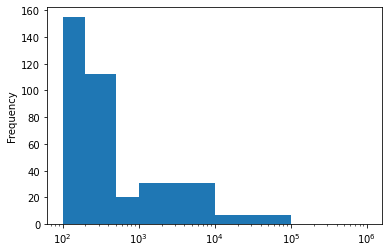

In [10]:
rel_counts.plot(kind="hist", logx=True, bins=[100,200, 500, 1e3,1e4,1e5,1e6])

In [11]:
relative_data_k182.groupby(by=['dut_pos_lead', 'dut_neg_lead']).count()

k182_dcv  temperature  pressure  humidity
dut_pos_lead dut_neg_lead                                           
D4190-3      D4910avg           191          191       191       191
D4190-4      D4910avg           201          201       201       201
D4700+10V    F7001bat           217          217       217       217
D4700-10V    F7001bat           201          201       201       201
D4910-1      D4910avg         11625        11625     11625     11625
             F7001bat          3254         3254      3254      3254
D4910-2      D4910avg          7961         7961      7961      7961
             F7001bat          1844         1844      1844      1844
D4910-3      D4910avg          3346         3346      3346      3346
             F7001bat          1900         1900      1900      1900
D4910-4      D4910avg          3221         3221      3221      3221
             F7001bat          2505         2505      2505      2505
D4910avg     D4190-2            230          230       230       230
             D4190-3            209          209       209       209
             D4190-4            135          135       135       135
             D4910-1           9097         9097      9097      9097
             D4910-2           6680         6680      6680      6680
             D4910-3           2642         2642      2642      2642
             D4910-4           2480         2480      2480      2480
             F7001bat         64280        64280     64280     64280
             F732a1            8456         8456      8456      8456
             F732a2         1174105      1174105   1174105   1174105
D4910avg-bat F7001bat           308          308       308       308
F7001bat     D4700+10V          185          185       185       185
             D4700-10V          198          198       198       198
             D4910-1           3116         3116      3116      3116
             D4910-2           1897         1897      1897      1897
             D4910-3           2279         2279      2279      2279
             D4910-4           1861         1861      1861      1861
             D4910avg         75739        75739     75739     75739
             F732a1            2786         2786      2786      2786
             F732a2           15806        15806     15806     15806
             F732a3            4985         4985      4985      4985
F732a1       D4910avg          7610         7610      7610      7610
             F7001bat          7295         7295      7295      7295
F732a2       D4910avg          8953         8953      8953      8953
             F7001bat          5364         5364      5364      5364
F732a3       F7001bat          6864         6864      6864      6864
short        D4910avg          3368         3368      3368      3368
             F732a2           20150        20150     20150     20150
             F732a3           27876        27876     27876     27876

## Check for sign flip

,dut_neg_lead,dut_pos_lead,k182_dcv,temperature,pressure,humidity,gap,group,sign
datetime,,,,,,,,,
2023-01-27 23:23:57.145406,D4910avg,F7001bat,-0.000063,28.689062,1030.115562,26.709386,True,9,-1.0
2023-01-27 23:23:57.435250,D4910avg,F7001bat,-0.000064,28.689062,1030.115562,26.709386,False,9,-1.0
2023-01-27 23:23:57.693478,D4910avg,F7001bat,-0.000063,28.689062,1030.115562,26.709386,False,9,-1.0
2023-01-27 23:23:57.953854,D4910avg,F7001bat,-0.000063,28.689062,1030.115562,26.709386,False,9,-1.0
2023-01-27 23:23:58.217669,D4910avg,F7001bat,-0.000063,28.689062,1030.115562,26.709386,False,9,-1.0
...,...,...,...,...,...,...,...,...,...
2023-01-28 00:11:40.922407,D4910avg,F7001bat,-0.000063,28.384180,1030.115130,26.861672,False,9,-1.0
2023-01-28 00:11:41.214983,D4910avg,F7001bat,-0.000062,28.384180,1030.115130,26.861672,False,9,-1.0
2023-01-28 00:11:41.478905,D4910avg,F7001bat,-0.000062,28.384180,1030.115130,26.861672,False,9,-1.0


,dut_neg_lead,dut_pos_lead,k182_dcv,temperature,pressure,humidity,gap,group,sign
datetime,,,,,,,,,


,dut_neg_lead,dut_pos_lead,k182_dcv,temperature,pressure,humidity,gap,group,sign
datetime,,,,,,,,,


,dut_neg_lead,dut_pos_lead,k182_dcv,temperature,pressure,humidity,gap,group,sign
datetime,,,,,,,,,
2023-01-27 23:24:49.593494,F7001bat,D4910avg,0.000063,28.663281,1030.173685,26.664547,False,9,1.0
2023-01-27 23:24:49.856018,F7001bat,D4910avg,0.000063,28.663281,1030.173685,26.664547,False,9,1.0
2023-01-27 23:24:50.120381,F7001bat,D4910avg,0.000063,28.663281,1030.173685,26.664547,False,9,1.0
2023-01-27 23:24:50.380210,F7001bat,D4910avg,0.000063,28.663281,1030.173685,26.664547,False,9,1.0
2023-01-27 23:24:50.638488,F7001bat,D4910avg,0.000064,28.663281,1030.173685,26.664547,False,9,1.0
...,...,...,...,...,...,...,...,...,...
2023-01-28 00:13:01.709912,F7001bat,D4910avg,0.000062,28.361914,1030.128611,26.868205,False,9,1.0
2023-01-28 00:13:01.971985,F7001bat,D4910avg,0.000062,28.361914,1030.128611,26.868205,False,9,1.0
2023-01-28 00:13:02.234607,F7001bat,D4910avg,0.000062,28.361914,1030.128611,26.868205,False,9,1.0


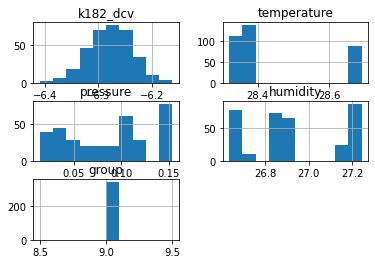

In [12]:
sample = rel_data_cut[(rel_data_cut.group == 9) & ((rel_data_cut.dut_neg_lead == 'D4910avg') | (rel_data_cut.dut_pos_lead == 'D4910avg')) & ((rel_data_cut.dut_neg_lead == 'F7001bat') | (rel_data_cut.dut_pos_lead == 'F7001bat'))].copy()
sample[sample.dut_pos_lead == 'F7001bat'].hist()
sample['sign'] = (sample.k182_dcv / sample.k182_dcv.abs())
res = sample.groupby(['dut_neg_lead', 'dut_pos_lead']).agg({'sign': 'unique'})
res['sign_length'] = res['sign'].apply(lambda r: len(r))
display(sample[(sample.dut_pos_lead == 'F7001bat') & (sample.k182_dcv < 0)])
display(sample[(sample.dut_pos_lead == 'F7001bat') & (sample.k182_dcv > 0)])
display(sample[(sample.dut_neg_lead == 'F7001bat') & (sample.k182_dcv < 0)])
display(sample[(sample.dut_neg_lead == 'F7001bat') & (sample.k182_dcv > 0)])